In [1]:
import torch
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

In [2]:
device = 'cpu'

In [3]:
ny = 2301
nx = 751
dx = 4.0
v_true = torch.from_file('marmousi_vp.bin',
                         size=ny*nx).reshape(ny, nx)

In [4]:
# Select portion of model for inversion
ny = 600
nx = 250
v_true = v_true[:ny, :nx]

In [5]:
# Smooth to use as starting model
v_init = torch.tensor(1/gaussian_filter(1/v_true.numpy(), 40)).to(device)

In [6]:
v = torch.from_file('marmousi_v_inv.bin',
                         size=ny*nx).reshape(ny, nx)

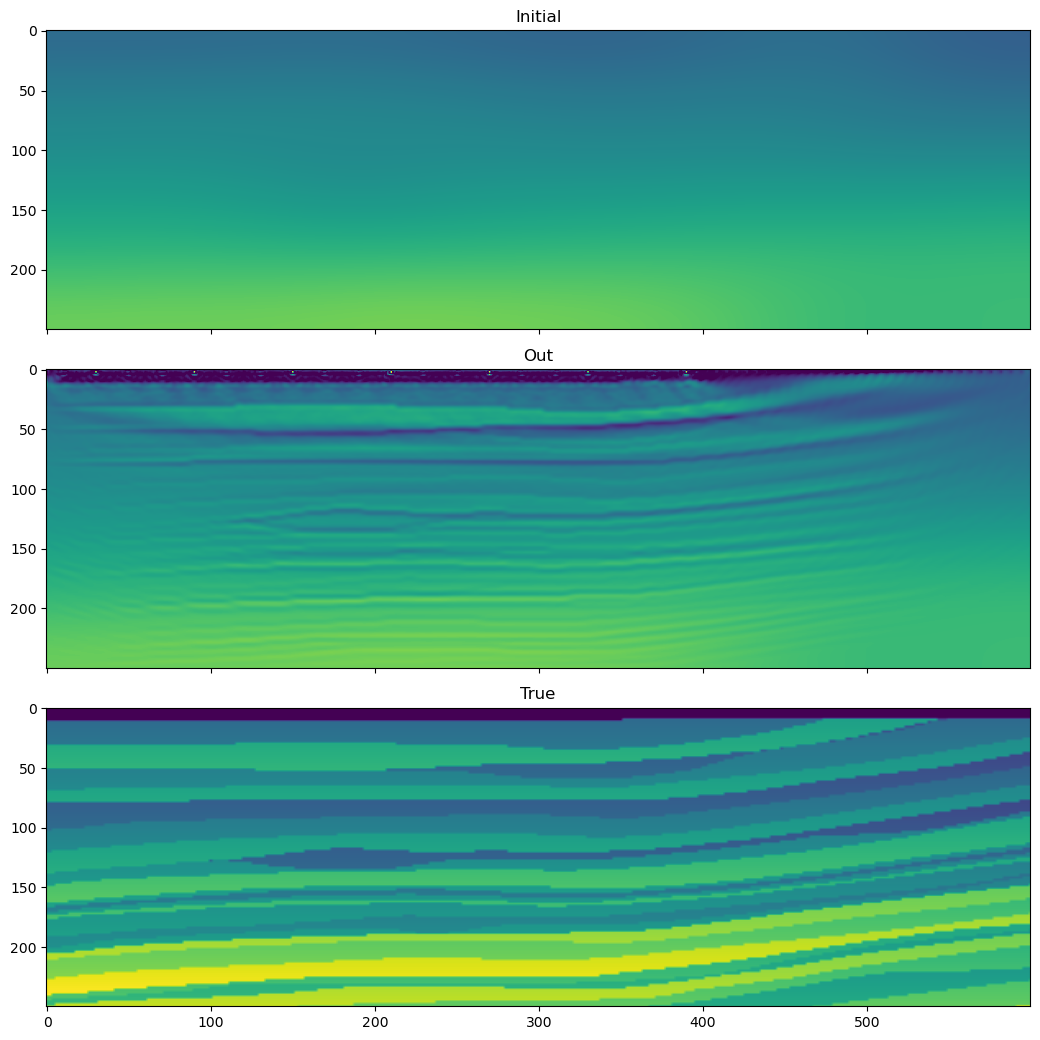

In [8]:
# Plot
vmin = v_true.min()
vmax = v_true.max()
_, ax = plt.subplots(3, figsize=(10.5, 10.5), sharex=True, sharey=True)
ax[0].imshow(v_init.cpu().T, aspect='auto', cmap='viridis',
              vmin=vmin, vmax=vmax)
ax[0].set_title("Initial")
ax[1].imshow(v.detach().cpu().T, aspect='auto', cmap='viridis',
             vmin=vmin, vmax=vmax)
ax[1].set_title("Out")
ax[2].imshow(v_true.cpu().T, aspect='auto', cmap='viridis',
              vmin=vmin, vmax=vmax)
ax[2].set_title("True")
plt.tight_layout()
plt.savefig('Example_simple_FWI_normalised.jpg')